# Talal Al-Dawudi's Data Wrangling & Analysis Project

## Introduction
The project aims to wrangle data from the WeRateDogs Twitter account to provide interesting insights and visualizations. 

We will be using data from 3 main sources: an archive of tweets for WeRateDogs, data that will be obtained via Twitter's API (Tweepy), and an image predictions file that attempts to predict the dog breed of each dog under a specific tweet_id.

Throughout the course of this project I will be:
1. Gathering Data for analysis from the aforementioned sources
2. Assessing the data both visually and programatically to find quality and tidiness issues that need to be solved.
3. Cleaning the quality and data issues via a 3-step process (describing the issue, coding to solve the issue, and testing the solution).
4. I will then be analyzing the clean data and providing some insights and visualizations that will help answer three questions.

# GATHERING DATA

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import json
import tweepy
import warnings

In [234]:
df = pd.read_csv('/Users/talaldawudi/Desktop/data_wrangling_project/twitter-archive-enhanced.csv')

In [235]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Using the requests library to download our tsv file:

In [236]:
img = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
response = requests.get(img)
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)
    
df2 = pd.read_csv('image_predictions.tsv', sep= '\t')

In [237]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [238]:
import tweepy

consumer_key = 'TaX4oqxxVTnR9ToqUfj54bBPO'
consumer_secret = 'wuQqJQaJJA3Y1pK8ZhK7T0lQmjF3kUj3Ud3ToKgeIBLYrnGfto'
access_token = '1308169205343293441-92igbpE6135GdUQ7Z9i5NZJdRX0wMo'
access_secret = 'FMGZMF4NuRyZxi6Gjkym431AqrjOwnMsNTEVKJ5hg6hMH'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [239]:
api.verify_credentials

<bound method API.verify_credentials of <tweepy.api.API object at 0x7fe6da4abd10>>

In [240]:
tweet_ids = df.tweet_id.unique()

In [241]:
#List of Tweets
list_of_tweets = []

for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')._json
        favorites = tweet['favorite_count']
        retweets = tweet['retweet_count']
        user_followers = tweet['user']['followers_count']
        date_time = tweet['created_at']

        list_of_tweets.append({'tweet_id': int(tweet_id),
                            'favorites': int(favorites),
                            'retweets': int(retweets),
                            'user_followers': int(user_followers),
                            'date_time': pd.to_datetime(date_time)})
    except Exception as error:
        print(error)
        
    ;

[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 299


[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 651


[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 653


In [242]:
print(f"Tweet list length: {len(list_of_tweets)}")

Tweet list length: 2331


I was able to retrieve 2331 records from WeRateDogs' tweets, with 25 errors detected. I will create a dataframe that includes the columns from our "list_of_tweets" list above, and save the data drame as "tweet_json.txt" in the next few lines of code, so that I'm able to retrive this data and use it in Jupyter Notebooks when moving on to the assessment stage of the project.

In [243]:
#Creating the dataframe
list_of_tweets_json = pd.DataFrame(list_of_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                                              'user_followers', 'date_time'])

#Saving the dataframe
list_of_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [244]:
#Reading the newly created dataframe to make sure all went well. 
#I will name the df "wrd_tweets" to work with for the remainder of the project.
wrd_tweets = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
wrd_tweets

,tweet_id,favorites,retweets,user_followers,date_time
0,892420643555336193,35539,7528,8864509,2017-08-01 16:23:56+00:00
1,892177421306343426,30737,5587,8864509,2017-08-01 00:17:27+00:00
2,891815181378084864,23121,3702,8864509,2017-07-31 00:18:03+00:00
3,891689557279858688,38828,7713,8864509,2017-07-30 15:58:51+00:00
4,891327558926688256,37110,8309,8864509,2017-07-29 16:00:24+00:00
...,...,...,...,...,...
2326,666049248165822465,95,40,8864547,2015-11-16 00:24:50+00:00
2327,666044226329800704,265,126,8864547,2015-11-16 00:04:52+00:00
2328,666033412701032449,110,39,8864547,2015-11-15 23:21:54+00:00
2329,666029285002620928,119,41,8864547,2015-11-15 23:05:30+00:00


In [245]:
wrd_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   int64 
 1   favorites       2331 non-null   int64 
 2   retweets        2331 non-null   int64 
 3   user_followers  2331 non-null   int64 
 4   date_time       2331 non-null   object
dtypes: int64(4), object(1)
memory usage: 91.2+ KB


## Gathering Stage Summary
Since we are able to confirm that the dataframe "wrd_tweets" has the same number of entries (2331) as above, and is saved in the format that I would like to use for the remainder of the project, we can move on to the assessment stage.

**Tasks completed (in consecutive order) during the gathering stage:**

1- Using pandas to obtain data from "twitter-archive-enhanced.csv" file.

2- Using the requests library to download "image-predictions.tsv" from the internet programatically.

3- Querying the Tweepy API to obtain a specific JSON object for every tweet in our archive and saving into "tweet_json.txt".

4- Creating a DataFrame (read as "wrd_tweets") to work with this data in the next stages of the project. 

  # ASSESSING DATA

In [246]:
#Obtain 10 random samples from the twitter archive dataframe to visually assess.
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2236,668154635664932864,NaN,NaN,2015-11-21 19:50:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Fun dogs here. Top one clearly an athlete. Bot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668154635...,9,10,None,None,None,None,None
305,836260088725786625,NaN,NaN,2017-02-27 17:01:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She spent all morning overseeing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836260088...,13,10,Lucy,None,None,None,None
719,783391753726550016,NaN,NaN,2016-10-04 19:42:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Godi. He's an avid beachgoer and part tim...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783391753...,13,10,Godi,None,None,None,None
1931,674036086168010753,NaN,NaN,2015-12-08 01:21:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Daisy. She has no eyes &amp; her face has...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674036086...,9,10,Daisy,None,None,None,None
2049,671504605491109889,NaN,NaN,2015-12-01 01:42:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He was just informed that dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671504605...,11,10,Charlie,None,None,None,None


In [247]:
#Programmatic assessment of the dataframe follows in the next few cells
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

From the above we can see that 181 of the 2356 tweets are retweets, we only want to work with original tweets from the WeRateDogs account.

In [248]:
df['tweet_id'].duplicated().any()

False

In [249]:
df['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Peanut       1
Keet         1
Maxwell      1
Liam         1
Vixen        1
Name: name, Length: 957, dtype: int64

In [250]:
dog_stages = ['puppo', 'floofer', 'doggo', 'pupper']
for stage in dog_stages:
    s = df[df[stage] == "None"]
    print(f'Number of values that are none for {stage} = {s.shape[0]}')
#Number of values that are not labeled as "None" for puppo

Number of values that are none for puppo = 2326
Number of values that are none for floofer = 2346
Number of values that are none for doggo = 2259
Number of values that are none for pupper = 2099


In [251]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [252]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [253]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [254]:
df['expanded_urls'].nunique()

2218

In [255]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [256]:
df[df['name'].apply(len) < 3]
#shows us how many names (including "a" from our previous df['name'].value_counts() code) have less than 3 characters
#It is unlikely that "a" and other 1 character names are the dogs' real names 
#Worth noting that some names like "Bo" and "Mo" are not unlikely to be dog names

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [257]:
#Now that we've taken a look at the archive dataframe, we should also visually assess Image Predictions (df2)
df2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1199,740711788199743490,https://pbs.twimg.com/media/CkeJcNkXEAAcrks.jpg,1,toy_poodle,0.388277,True,Angora,0.180264,False,Persian_cat,0.049656,False
609,680085611152338944,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,3,pillow,0.778113,False,apron,0.095023,False,wallet,0.049326,False
1163,735137028879360001,https://pbs.twimg.com/media/CjO7OfeWgAAUQy-.jpg,1,Walker_hound,0.413535,True,beagle,0.233891,True,English_foxhound,0.164943,True
862,697255105972801536,https://pbs.twimg.com/media/Ca0lzzmWwAA5u56.jpg,1,Great_Dane,0.173989,True,malinois,0.165888,True,Doberman,0.119890,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
310,671542985629241344,https://pbs.twimg.com/media/CVHMyHMWwAALYXs.jpg,1,Shetland_sheepdog,0.980339,True,collie,0.006693,True,papillon,0.006157,True
768,689280876073582592,https://pbs.twimg.com/media/CZDRTAPUoAEaqxF.jpg,3,Chihuahua,0.637546,True,American_Staffordshire_terrier,0.150694,True,Staffordshire_bullterrier,0.103953,True
841,694905863685980160,https://pbs.twimg.com/media/CaTNMUgUYAAB6vs.jpg,1,bow_tie,0.449268,False,fur_coat,0.139099,False,black-footed_ferret,0.082232,False
692,684222868335505415,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False
502,675870721063669760,https://pbs.twimg.com/media/CWEs1b-WEAEhq82.jpg,1,golden_retriever,0.263892,True,Welsh_springer_spaniel,0.184193,True,beagle,0.182241,True


In [258]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [259]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [260]:
df2['jpg_url'].nunique()

2009

In [261]:
wrd_tweets

,tweet_id,favorites,retweets,user_followers,date_time
0,892420643555336193,35539,7528,8864509,2017-08-01 16:23:56+00:00
1,892177421306343426,30737,5587,8864509,2017-08-01 00:17:27+00:00
2,891815181378084864,23121,3702,8864509,2017-07-31 00:18:03+00:00
3,891689557279858688,38828,7713,8864509,2017-07-30 15:58:51+00:00
4,891327558926688256,37110,8309,8864509,2017-07-29 16:00:24+00:00
...,...,...,...,...,...
2326,666049248165822465,95,40,8864547,2015-11-16 00:24:50+00:00
2327,666044226329800704,265,126,8864547,2015-11-16 00:04:52+00:00
2328,666033412701032449,110,39,8864547,2015-11-15 23:21:54+00:00
2329,666029285002620928,119,41,8864547,2015-11-15 23:05:30+00:00


In [262]:
wrd_tweets.describe()

,tweet_id,favorites,retweets,user_followers
count,2.331000e+03,2331.000000,2331.000000,2.331000e+03
mean,7.419079e+17,7426.223938,2647.036036,8.864529e+06
std,6.823170e+16,11532.265967,4476.577500,6.128483e+01
min,6.660209e+17,0.000000,1.000000,8.864509e+06
25%,6.782670e+17,1291.000000,536.500000,8.864514e+06
50%,7.182469e+17,3226.000000,1237.000000,8.864526e+06
75%,7.986692e+17,9092.000000,3072.000000,8.864529e+06
max,8.924206e+17,153366.000000,76064.000000,8.865204e+06


## Quality Issues

**df: Our tweet archive dataset** 

1. Timestamp, retweeted_status_timestamp are in string format instead of datetime, which can be problematic.
2. Some of the tweets in our archive are retweets and some have no images, we only want to work with original tweets that contain images.
3. Many of the names that appear in the 'name' column are invalid. Some of these include "a" and "None"
4. The float values for in_reply_to_status_id, in_reply_to_user_id would be better if converted to strings and integers.
5. In several columns null objects are non-null (change them from "none" and "not" to NaN).
6. Make the multiple stages for (ex: doggo,floofer) say multiple instead of having both values.


**df2: The image_predictions dataset**

6. There are only 2075 values in this dataset compared to the 2356 in the tweet archive dataset
7. 64 out of 2075 tweets have the same jpg_url from the image_predictions dataset
8. we do not need all of the image predictions (p1,p2,p3) in this dataset. Not all of it is useful. We can create a prediction column and confidence interval column that only contain predictions that were True.

**wrd_tweets dataset**

9. Change tweet_id from type int to type object since its an arbitrary number with no calculation needs.



## Tidiness Issues


1. No need for the "stage" columns to be separated as 4 separate columns (doggo, floofer, puppo and pupper). We can unify the columns to tell us which stage the dog is at for each tweet_id
2. We can create a master dataframe by joining df and df2 with the "wrd_tw


# CLEANING DATA

In [263]:
#We will start off the cleaning process by creating copies of our dataframes, so we still have originals if needed
df_clean = df.copy()
df2_clean = df2.copy()
wrd_tweets_clean = wrd_tweets.copy()

**Define Issue**: We will need to join df1 and df2 with "wrd_tweets" dataframe to have one master df to work out of

**Code:**

In [264]:
#First merge df1_clean with wrd_tweets_clean

wrd_tweets_clean = pd.merge(left=wrd_tweets_clean, right=df_clean, left_on='tweet_id', 
                            right_on='tweet_id', how='inner')


In [265]:
#Then we merge df2_clean (image predictions) with the new wrd_tweets_clean df
wrd_tweets_clean = wrd_tweets_clean.merge(df2_clean, on='tweet_id', how='inner')


**Test:**

In [266]:
wrd_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   favorites                   2059 non-null   int64  
 2   retweets                    2059 non-null   int64  
 3   user_followers              2059 non-null   int64  
 4   date_time                   2059 non-null   object 
 5   in_reply_to_status_id       23 non-null     float64
 6   in_reply_to_user_id         23 non-null     float64
 7   timestamp                   2059 non-null   object 
 8   source                      2059 non-null   object 
 9   text                        2059 non-null   object 
 10  retweeted_status_id         72 non-null     float64
 11  retweeted_status_user_id    72 non-null     float64
 12  retweeted_status_timestamp  72 non-null     object 
 13  expanded_urls               2059 

First step in our cleaning process has been successful. Our wrd_tweets_clean dataframe now contains all the columns we wanted to merge from df1 and df2. 

**Define:** In our assessment stage, we identified data that we want to omit from our analysis. This includes all retweets from the account and tweets without images. We will get rid of this data in this step.

**Code:**

In [267]:
# We will start with getting rid of retweet values
wrd_tweets_clean = wrd_tweets_clean[pd.isnull(wrd_tweets_clean.retweeted_status_id)]

# Then we want to get rid of tweets with no images
wrd_tweets_clean = wrd_tweets_clean.dropna(subset = ['jpg_url'])


In [268]:
#Now that the values we don't need are deleted, we can start removing retweet columns
wrd_tweets_clean = wrd_tweets_clean.drop('retweeted_status_id', 1)
wrd_tweets_clean = wrd_tweets_clean.drop('retweeted_status_user_id', 1)
wrd_tweets_clean = wrd_tweets_clean.drop('retweeted_status_timestamp', 1)

**Test:**

In [269]:
#The test below shows that the columns we wanted removed are gone (all retweet columns).
#The test also shows that now only 1987 rows remain for the majority of the data that we need
wrd_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1987 non-null   int64  
 1   favorites              1987 non-null   int64  
 2   retweets               1987 non-null   int64  
 3   user_followers         1987 non-null   int64  
 4   date_time              1987 non-null   object 
 5   in_reply_to_status_id  23 non-null     float64
 6   in_reply_to_user_id    23 non-null     float64
 7   timestamp              1987 non-null   object 
 8   source                 1987 non-null   object 
 9   text                   1987 non-null   object 
 10  expanded_urls          1987 non-null   object 
 11  rating_numerator       1987 non-null   int64  
 12  rating_denominator     1987 non-null   int64  
 13  name                   1987 non-null   object 
 14  doggo                  1987 non-null   object 
 15  floo

**Define:** We do not need the dog stage to be 4 different columns, we can melt or compress these 4 columns into one for a better dataset.

**Code:**

In [270]:
# We will choose our four columns to melt, and keep everything else intact
Melt = ['pupper', 'puppo','doggo', 'floofer',]
Keep = [x for x in wrd_tweets_clean.columns.tolist() if x not in Melt]

wrd_tweets_clean = pd.melt(wrd_tweets_clean, id_vars = Keep, value_vars = Melt, var_name = 'stages',
                           value_name = 'dog_stages')


In [271]:
wrd_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               7948 non-null   int64  
 1   favorites              7948 non-null   int64  
 2   retweets               7948 non-null   int64  
 3   user_followers         7948 non-null   int64  
 4   date_time              7948 non-null   object 
 5   in_reply_to_status_id  92 non-null     float64
 6   in_reply_to_user_id    92 non-null     float64
 7   timestamp              7948 non-null   object 
 8   source                 7948 non-null   object 
 9   text                   7948 non-null   object 
 10  expanded_urls          7948 non-null   object 
 11  rating_numerator       7948 non-null   int64  
 12  rating_denominator     7948 non-null   int64  
 13  name                   7948 non-null   object 
 14  jpg_url                7948 non-null   object 
 15  img_

In [272]:
#We only need the dog_stages column, stages is redundant. We will get rid of it
wrd_tweets_clean = wrd_tweets_clean.drop('stages', 1)

In [273]:
#When we melted the dog columns into dog_stages, we created many duplicates (as can be seen from the 7948 above)
#We need to drop those duplicates before we move on
wrd_tweets_clean = wrd_tweets_clean.sort_values('dog_stages').drop_duplicates('tweet_id', keep = 'last')


**Test:**

In [274]:
wrd_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 1954 to 2309
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1987 non-null   int64  
 1   favorites              1987 non-null   int64  
 2   retweets               1987 non-null   int64  
 3   user_followers         1987 non-null   int64  
 4   date_time              1987 non-null   object 
 5   in_reply_to_status_id  23 non-null     float64
 6   in_reply_to_user_id    23 non-null     float64
 7   timestamp              1987 non-null   object 
 8   source                 1987 non-null   object 
 9   text                   1987 non-null   object 
 10  expanded_urls          1987 non-null   object 
 11  rating_numerator       1987 non-null   int64  
 12  rating_denominator     1987 non-null   int64  
 13  name                   1987 non-null   object 
 14  jpg_url                1987 non-null   object 
 15  i

We successfully melted the 4 categories into one category "dog stages", and got rid of all the duplicates that resulted.

**Define:** Handling Nones and multiple stages for dog_stages

**Code:** 

In [275]:
wrd_tweets_clean.loc[wrd_tweets_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
wrd_tweets_clean.loc[wrd_tweets_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
wrd_tweets_clean.loc[wrd_tweets_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

In [276]:
wrd_tweets_clean.dog_stages.replace('None', '', inplace=True)

In [277]:
wrd_tweets_clean.loc[wrd_tweets_clean.dog_stages == '', 'dog_stages'] = np.nan


**Test:**

In [278]:
wrd_tweets_clean.dog_stages.value_counts()

pupper     212
doggo       62
puppo       23
floofer      8
Name: dog_stages, dtype: int64

In [279]:
#Great, our value counts show that there are no dogs with multiple stages and no values shown as "None"

**Define:** Many of the datatypes of our columns are not suited to their functions. We will change all column datatypes that need changing (all mentioned in assessment stage above).

**Code:**

In [280]:
#Converting to different types
wrd_tweets_clean['tweet_id'] = wrd_tweets_clean['tweet_id'].astype(str)
wrd_tweets_clean['timestamp'] = pd.to_datetime(wrd_tweets_clean.timestamp)
wrd_tweets_clean['favorites'] = wrd_tweets_clean['favorites'].astype(int)
wrd_tweets_clean['retweets'] = wrd_tweets_clean['retweets'].astype(int)
wrd_tweets_clean['user_followers'] = wrd_tweets_clean['user_followers'].astype(int)
wrd_tweets_clean['dog_stages'] = wrd_tweets_clean['dog_stages'].astype('category')
wrd_tweets_clean['rating_numerator'] = wrd_tweets_clean['rating_numerator'].astype(int)
wrd_tweets_clean['rating_denominator'] = wrd_tweets_clean['rating_denominator'].astype(int)

**Test:**

In [281]:
wrd_tweets_clean.dtypes

tweet_id                              object
favorites                              int64
retweets                               int64
user_followers                         int64
date_time                             object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                datetime64[ns, UTC]
source                                object
text                                  object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
jpg_url                               object
img_num                                int64
p1                                    object
p1_conf                              float64
p1_dog                                  bool
p2                                    object
p2_conf                              float64
p2_dog                                  bool
p3        

In [282]:
#Everything looks good, but we have a date_time column as type object. 
#Since we already have a timestamp column in datetime format, we can just drop the date_time column
wrd_tweets_clean = wrd_tweets_clean.drop('date_time', 1)

In [283]:
wrd_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 1954 to 2309
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1987 non-null   object             
 1   favorites              1987 non-null   int64              
 2   retweets               1987 non-null   int64              
 3   user_followers         1987 non-null   int64              
 4   in_reply_to_status_id  23 non-null     float64            
 5   in_reply_to_user_id    23 non-null     float64            
 6   timestamp              1987 non-null   datetime64[ns, UTC]
 7   source                 1987 non-null   object             
 8   text                   1987 non-null   object             
 9   expanded_urls          1987 non-null   object             
 10  rating_numerator       1987 non-null   int64              
 11  rating_denominator     1987 non-null   int64         

wrd_tweets_clean no longer has a date_time column. 

**Define:** Get rid of the excessive image prediction columns (p1, p2, etc..), and instead replace them with prediction and confidence level columns. The prediction column will take the first true prediction and add it to the predictions column, and take the confidence level of that true prediction and add it to the confidence level column that we create.

**Code:**

In [284]:
#We need to create the columns we need, create a function for these columns, and apply them to our df:
prediction = []
confidence_level = []

def prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence_level.append(0)
        
wrd_tweets_clean.apply(prediction_confidence, axis =1)
wrd_tweets_clean['prediction'] = prediction
wrd_tweets_clean['confidence_level'] = confidence_level 


In [285]:
#Now that we have created the new columns, we can get rid of all of the excess columns we have
wrd_tweets_clean = wrd_tweets_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                                                    'p2_dog', 'p3', 'p3_conf', 'p3_dog',
                                         'in_reply_to_status_id', 'in_reply_to_user_id'], 1)

**Test:**

In [286]:
#Let's get a quick snapshot of what happened to our columns first
wrd_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 1954 to 2309
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   object             
 1   favorites           1987 non-null   int64              
 2   retweets            1987 non-null   int64              
 3   user_followers      1987 non-null   int64              
 4   timestamp           1987 non-null   datetime64[ns, UTC]
 5   source              1987 non-null   object             
 6   text                1987 non-null   object             
 7   expanded_urls       1987 non-null   object             
 8   rating_numerator    1987 non-null   int64              
 9   rating_denominator  1987 non-null   int64              
 10  name                1987 non-null   object             
 11  jpg_url             1987 non-null   object             
 12  dog_stages          305 non-nul

In [287]:
#Great, much cleaner outcome. Let's see how that turned out visually
wrd_tweets_clean.sample(5)

,tweet_id,favorites,retweets,user_followers,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,dog_stages,prediction,confidence_level
1342,681679526984871937,1727,429,8864528,2015-12-29 03:33:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Can you spot Toby the guilty pupper? 7/10 woul...,https://twitter.com/dog_rates/status/681679526...,7,10,None,https://pbs.twimg.com/media/CXXP5O4WEAA4dgS.jpg,pupper,NaN,0.000000
2795,738402415918125056,3183,808,8864519,2016-06-02 16:10:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Don't talk to me or my son ever again"" ...10/...",https://twitter.com/dog_rates/status/738402415...,10,10,None,https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg,NaN,cocker_spaniel,0.346695
117,863432100342583297,22350,4829,8864510,2017-05-13 16:33:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Belle. She's never been more pupset. E...,https://twitter.com/dog_rates/status/863432100...,12,10,Belle,https://pbs.twimg.com/media/C_uG6eAUAAAvMvR.jpg,NaN,Staffordshire_bullterrier,0.690517
2906,716439118184652801,2324,203,8864526,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,NaN,Siberian_husky,0.396495
2242,831650051525054464,7042,1894,8864513,2017-02-14 23:43:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...","I usually only share these on Friday's, but th...","http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,https://pbs.twimg.com/media/C4qdThOWAAI3WX3.jpg,NaN,Eskimo_dog,0.530416


In [288]:
#Looking much better, we still need to fix the issue of nulls being written as non-nulls
#In the text above, the second entry for Jordy has a null prediction written in string format as 'NaN'

**Define:** There are non null values which actually should be null but are written as "None" or "Nan"

**Code:** 

In [289]:
wrd_tweets_clean['name'].value_counts()

None       546
a           55
Oliver      10
Cooper      10
Charlie     10
          ... 
Leonard      1
Emmie        1
Darla        1
General      1
Vixen        1
Name: name, Length: 934, dtype: int64

In [290]:
wrd_tweets_clean.loc[wrd_tweets_clean['prediction'] == 'NaN', 'prediction'] = None
wrd_tweets_clean.loc[wrd_tweets_clean['name'] == 'Nan', 'name'] = None
wrd_tweets_clean.loc[wrd_tweets_clean['name'] == 'a', 'name'] = None
wrd_tweets_clean.loc[wrd_tweets_clean['name'] == 'None', 'name'] = None

**Test:**

In [291]:
wrd_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 1954 to 2309
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   object             
 1   favorites           1987 non-null   int64              
 2   retweets            1987 non-null   int64              
 3   user_followers      1987 non-null   int64              
 4   timestamp           1987 non-null   datetime64[ns, UTC]
 5   source              1987 non-null   object             
 6   text                1987 non-null   object             
 7   expanded_urls       1987 non-null   object             
 8   rating_numerator    1987 non-null   int64              
 9   rating_denominator  1987 non-null   int64              
 10  name                1386 non-null   object             
 11  jpg_url             1987 non-null   object             
 12  dog_stages          305 non-nul

In [292]:
#As we can see above, name and prediction columns have been adjusted so that null/invalid values show up as null

In [293]:
#Here's how the df turned out
wrd_tweets_clean.sample(5)

,tweet_id,favorites,retweets,user_followers,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,dog_stages,prediction,confidence_level
2894,718460005985447936,2629,511,8864519,2016-04-08 15:26:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bowie. He's listening for underground squ...,https://twitter.com/dog_rates/status/718460005...,9,10,Bowie,https://pbs.twimg.com/media/Cfh7j6CWQAAndTd.jpg,NaN,Boston_bull,0.252781
3354,680497766108381184,4130,1855,8864529,2015-12-25 21:18:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Percy. He's a Latvian Yuletide Heineken. ...,https://twitter.com/dog_rates/status/680497766...,12,10,Percy,https://pbs.twimg.com/media/CXGdG0aWcAEbOO1.jpg,NaN,Chihuahua,0.538354
2585,768970937022709760,14222,6445,8864515,2016-08-26 00:38:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Kirby. His bowl weighs more than him. ...,https://twitter.com/dog_rates/status/768970937...,12,10,Kirby,https://pbs.twimg.com/ext_tw_video_thumb/76896...,NaN,Pomeranian,0.182358
3690,671147085991960577,625,201,8864529,2015-11-30 02:01:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,https://twitter.com/dog_rates/status/671147085...,9,10,None,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,NaN,Yorkshire_terrier,0.467202
1233,688519176466644993,2269,711,8864528,2016-01-17 00:32:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is sprouting a flower out of her h...,https://twitter.com/dog_rates/status/688519176...,12,10,None,https://pbs.twimg.com/media/CY4ciRFUMAAovos.jpg,pupper,Pembroke,0.696372


# STORING DATA

In [294]:
#Storing the wrd_tweets_clean in a CSV file called twitter_archive_master.csv
wrd_tweets_clean.drop(wrd_tweets_clean.columns[wrd_tweets_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
wrd_tweets_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

In [295]:
#Double checking to see if the CSV file was saved
wrd_tweets_clean = pd.read_csv('twitter_archive_master.csv')
wrd_tweets_clean.head()

,tweet_id,favorites,retweets,user_followers,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,dog_stages,prediction,confidence_level
0,666428276349472768,150,73,8864547,2015-11-17 01:30:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an Austrian Pulitzer. Collectors ...,https://twitter.com/dog_rates/status/666428276...,7,10,NaN,https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg,NaN,Pembroke,0.371361
1,666430724426358785,291,173,8864547,2015-11-17 01:40:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh boy what a pup! Sunglasses take this one to...,https://twitter.com/dog_rates/status/666430724...,6,10,NaN,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,NaN,Irish_terrier,0.104109
2,666435652385423360,152,45,8864547,2015-11-17 02:00:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Can you behave? You're ruining my wedding day...",https://twitter.com/dog_rates/status/666435652...,10,10,NaN,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,NaN,Chesapeake_Bay_retriever,0.184130
3,666437273139982337,113,42,8864547,2015-11-17 02:06:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a lone northeastern Cumberbatch. H...,https://twitter.com/dog_rates/status/666437273...,7,10,NaN,https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg,NaN,Chihuahua,0.671853
4,666447344410484738,94,18,8864547,2015-11-17 02:46:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,https://twitter.com/dog_rates/status/666447344...,9,10,Scout,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,NaN,curly-coated_retriever,0.322084


In [296]:
#and checking to make sure all the info is intact
wrd_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1987 non-null   int64  
 1   favorites           1987 non-null   int64  
 2   retweets            1987 non-null   int64  
 3   user_followers      1987 non-null   int64  
 4   timestamp           1987 non-null   object 
 5   source              1987 non-null   object 
 6   text                1987 non-null   object 
 7   expanded_urls       1987 non-null   object 
 8   rating_numerator    1987 non-null   int64  
 9   rating_denominator  1987 non-null   int64  
 10  name                1386 non-null   object 
 11  jpg_url             1987 non-null   object 
 12  dog_stages          305 non-null    object 
 13  prediction          1679 non-null   object 
 14  confidence_level    1987 non-null   float64
dtypes: float64(1), int64(6), object(8)
memory usage: 233.0+

In [297]:
#Looks good!

# VISUALIZING AND ANALYZING DATA

In [298]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1987 non-null   int64  
 1   favorites           1987 non-null   int64  
 2   retweets            1987 non-null   int64  
 3   user_followers      1987 non-null   int64  
 4   timestamp           1987 non-null   object 
 5   source              1987 non-null   object 
 6   text                1987 non-null   object 
 7   expanded_urls       1987 non-null   object 
 8   rating_numerator    1987 non-null   int64  
 9   rating_denominator  1987 non-null   int64  
 10  name                1386 non-null   object 
 11  jpg_url             1987 non-null   object 
 12  dog_stages          305 non-null    object 
 13  prediction          1679 non-null   object 
 14  confidence_level    1987 non-null   float64
dtypes: float64(1), int64(6), object(8)
memory usage: 233.0+

In [299]:
wrd_tweets_clean.dog_stages

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1982    puppo
1983    puppo
1984    puppo
1985    puppo
1986    puppo
Name: dog_stages, Length: 1987, dtype: object

In [300]:
#Our Dtypes seem to have changed during after we read the CSV, we should convert them back to the types we want

df['tweet_id'] = df['tweet_id'].astype(object)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['rating_numerator'] = df['rating_numerator'].astype(str)
df['dog_stages'] = df['dog_stages'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   object             
 1   favorites           1987 non-null   int64              
 2   retweets            1987 non-null   int64              
 3   user_followers      1987 non-null   int64              
 4   timestamp           1987 non-null   datetime64[ns, UTC]
 5   source              1987 non-null   object             
 6   text                1987 non-null   object             
 7   expanded_urls       1987 non-null   object             
 8   rating_numerator    1987 non-null   object             
 9   rating_denominator  1987 non-null   int64              
 10  name                1386 non-null   object             
 11  jpg_url             1987 non-null   object             
 12  dog_stages          305 non-null  

In [301]:
#Now that our data has been set to the Dtypes we want, we can start visualizing and analyzing our data.

Below you can find some visualizations and insights regarding the data that was wrangled for this project. I will aim to answer some questions about the data visually.

### Question 1: Is there a relationship between the amount of retweets and the amount of favorites a tweet gets?

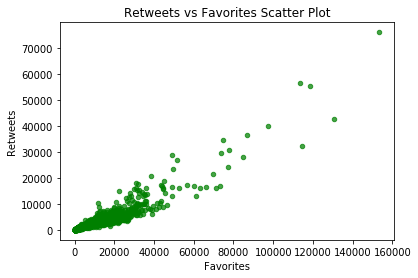

In [304]:
#Retweets vs. Likes

df.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.7273, color = 'green')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets vs Favorites Scatter Plot')

plt.savefig('retweets_favorites_scatter.png')

There definitely seems to be a positive correlation between the amount of favorites and retweets a tweet gets. 
The tweet that got the most favorites (by over 20,000!) is also the tweet that got the most retweets (also by over 20,000!).
I'm interested in knowing a little more about the tweet (and dog) that was able to garner so much attention on twitter.

In [305]:
# Looks like the dog is likely to be a labrador retriever in the "doggo" stage. 
df[df['favorites'] > 150000]

,tweet_id,favorites,retweets,user_followers,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,dog_stages,prediction,confidence_level
1682,744234799360020481,153366,76064,8864519,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,https://pbs.twimg.com/ext_tw_video_thumb/74423...,doggo,Labrador_retriever,0.825333


### Question 2: Is there a dog breed (based on type listed in prediction) that seems to be the most popular?

In [306]:
#This answer will not be 100% accurate because we're only "predicting" the dog's breed through image_predictions.
#We can start by finding out what the threshold for "popularity" will be.
df.describe()

,favorites,retweets,user_followers,rating_denominator,confidence_level
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000
mean,8126.364872,2404.270760,8.864529e+06,10.533971,0.463913
std,11968.161419,4301.605962,5.947218e+01,7.333532,0.339364
min,69.000000,11.000000,8.864509e+06,2.000000,0.000000
25%,1743.000000,537.500000,8.864514e+06,10.000000,0.140041
50%,3674.000000,1164.000000,8.864527e+06,10.000000,0.457356
75%,10101.000000,2738.500000,8.864529e+06,10.000000,0.776138
max,153366.000000,76064.000000,8.865204e+06,170.000000,0.999956


The info above indicates that having more than 2408 retweets and 8134 favorites renders a tweet above average. 

A retweet count of over 2744, and a favorite count of more than 10,111 puts a tweet in the top quartile of all tweets in our dataframe.

For simplicity's sake, we will dub any tweet that has reached more than 3,000 retweets and 10,000 favorites as "popular".

In [307]:
#Getting value count of dog breeds that achieved more than 3000 retweets and 10000 favorites
popular_dogs = df.query('retweets > 3000 & favorites > 10000').prediction.value_counts()
popular_dogs

golden_retriever        49
Labrador_retriever      31
Pembroke                27
Chihuahua               17
Samoyed                 16
                        ..
Old_English_sheepdog     1
Australian_terrier       1
malinois                 1
Gordon_setter            1
Leonberg                 1
Name: prediction, Length: 81, dtype: int64

Based on the list above, it seems as though golden retrievers garner the highest amount of engagement (49 of the top retweeted and favorited dogs were golden retrievers), followed by labrador retrivers, pembrokes and chihuahuas.

### Question 3: What rating is given most frequently by the account holder?

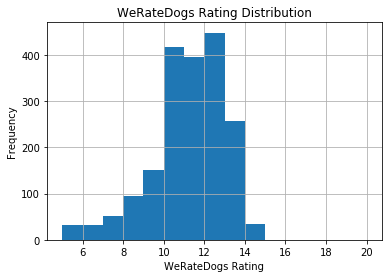

In [325]:
#We will discard the ratings that fall far beyond the distribution, and outliers that have only 1 or 2 occurrences.
#We will consider ratings from 5-20 (15 bins in our histogram) to determine which rating is most frequent. 
df['rating_numerator'].astype(int)
df.hist(column='rating_numerator', bins = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel('WeRateDogs Rating')
plt.ylabel('Frequency')
plt.title('WeRateDogs Rating Distribution')
plt.savefig('rating_distribution_histogram')

Our distribution in the Histogram above shows that the majority of our ratings fall between 10 and 13. 